# Lab 2: Histograms, law of large numbers, simulating simple games

Please begin by running the code in the following cell to import the packages that are used in this notebook.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
print ("Modules Imported!")

Modules Imported!


## Plotting a Histogram:

A histogram is a graphical representation of a distribution. It shows the frequency at which values occur. Suppose a probability class has 400 students in it. We can simulate random tests scores (with an average of 70) and plot a histogram. The np.random.rand() function returns a number between 0 and 1. It is from a __continuous uniform distribution__ on this interval. It means that __for any $c$ between 0 and 1, the probability the sample number is less than or equal to $c$ is equal to $c.$__

Text(0, 0.5, 'Number of Students')

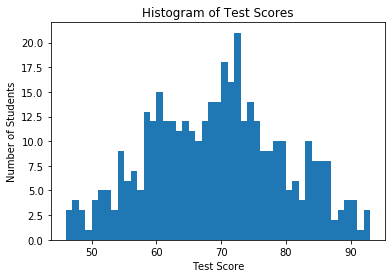

In [2]:
x = np.zeros(400) #Generates an initial array with 400 students
for i in range(400): #Loops through each of the students
    x[i] = (int)(25*(np.random.rand()-np.random.rand())+70) #Generates a random test score for that student
plt.hist(x,bins=int(np.max(x)-np.min(x))) #Plots a Histogram in range of all valid test scores
plt.title("Histogram of Test Scores")
plt.xlabel('Test Score')
plt.ylabel('Number of Students')

For simulation purposes, it is useful to __be able to get a value after a single trial of an RV based on a certain distribution__. These are called __random variates__. From the stats module we've used, you simply need to call the rvs function with a size as an input. NumPy also has an easy way to do this through the random module. When you run the code below, you should see two histograms from the same normal distributions. 

Text(0.5, 1.0, 'Histogram of NumPy Normal Distribution')

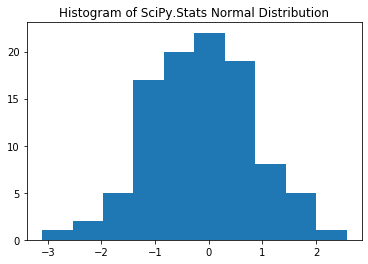

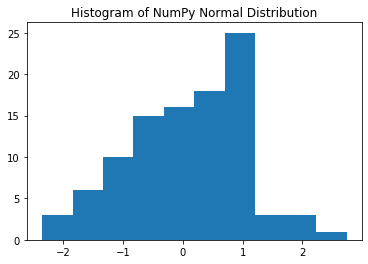

In [3]:
#Simulates a Gaussian RV 100 times in two different ways and creates a histogram

X = st.norm()
# np.random.seed(100)
x = X.rvs(size = 100) #Generates a vector with the results of 100 outputs or trials based on the standard Gaussian distribution
# np.random.seed(100)
y = np.random.normal(size = 100) #Generates a vector with the results of 100 outputs based on the standard Gaussian distribution
plt.hist(x); #Creates a histogram of those results, the default value for the number of bins is bins=10
plt.title('Histogram of SciPy.Stats Normal Distribution')
plt.figure()
plt.hist(y);
plt.title('Histogram of NumPy Normal Distribution')

The scipy and numpy methods for getting these variates should produce the same results, but the two histograms are different. This is due to the random number generator. If we seed the random number generator before running the methods, they should produce consistent results. In the code there are two commented lines with np.random.seed(100). Uncomment these, and run the code again. You should see the histograms are the same now. Essentially, seeding the random number generator, tells it where to start in its sequence.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Using the custom discrete variable you made for a roll of the die in Lab 1, or some other method (include a text cell or a comment in the code to explain your method): 

1. Simulate 100 rolls using the .rvs() method in the stats module. Plot a histogram of the results. Is it what you would expect?
2. Now simulate 10,000 rolls of the die and again plot a histogram. Observe any difference and explain your observation. 

Text(0.5, 1.0, 'Histogram of Simulation for 10000 Rolls of a Die')

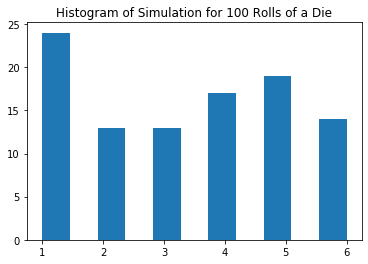

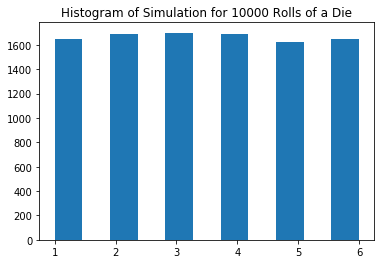

In [4]:
# Your code here

# I use the custom discrete variable I made for a roll of the die in Lab 1
p_2 = (1./6,1./6,1./6,1./6,1./6,1./6) #Vector of probabilities (as a tuple)
c_2 = (1,2,3,4,5,6) #Vector of values (as a tuple)
Xcstm_2 = st.rv_discrete(values=(c_2,p_2)) #Creates an instance (aka object) of rv_discrete from our vectors

# simulate 100 rolls
Xcstm_2_100 = Xcstm_2.rvs(size=100)

# simulate 10000 rolls
Xcstm_2_10000 = Xcstm_2.rvs(size=10000)

# plot histogram
plt.hist(Xcstm_2_100, bins=11); #Creates a histogram of those results, the default value for the number of bins is bins=10
plt.title('Histogram of Simulation for 100 Rolls of a Die')
plt.figure()
plt.hist(Xcstm_2_10000, bins=11);
plt.title('Histogram of Simulation for 10000 Rolls of a Die')

__Answer:__ 

__A1__: No, it isn't. Rolling a fair die is expected to give even distribution of the times each number appears, because the probability for each number to appear is the same as $\frac{1}{6}$. However, the histogram of simulation for 100 rolls of a die is a bit far from even distribution, which is beyong my expectation. 

__B1__: By contrast, the histogram of simulation for 10000 rolls of a die gives nearly even distribution. When the number of simulated rolls is relatively small, the simulation times may not be large enough to reveal the equal probability for each number to appear, because of the randomness linked with the experiment. However, when the number of simulated rolls is large enough, the equal probability for each number to appear can be revealed, because the large simulation times can overcome the shortage of the simulation brought by its randomness, where The Law of Large Numbers applies.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

## The Law of Large Numbers:

__The law of large numbers describes the result of performing the same experiment a large number of times.__ Let $X_1,X_2, \ldots ,X_n$ be a set of uncorrelated random variables, each with a finite mean of $\mu$. Let $S_n$ represent the sum of these random variables: $S_n=X_1+X_2+...+X_n$. The law of large numbers states that $P\left\{\Big|\frac{S_n}{n}-\mu\Big|\ge\delta\right\}\le\frac{C}{n\delta^2}\to0$ as $n\to\infty$. Put another way this simply states that __the sum of the RVs divided by n converges in some sense to the mean ($\frac{S_n}{n}\to\mu$)__. A proof of this is given in the ECE 313 textbook, using a bounded variance assumption and the Chebychev inequality.

To observe this behavior by simulation, let's look at the Poisson distribution. A Poisson RV has a single parameter $\lambda$ which represents the mean number of occurances or counts, such as the mean number of hits your Youtube video gets in a day.  Then the probability that your video gets $i$ hits in one day is given by the pmf: $p(i)=\frac{\lambda^ie^{-\lambda}}{i!}$. So what if you totalled the number of hits you received each day for a week, month, or year and divided by that many days? The law of large numbers asserts that as $n$ gets large this should go to the mean $\lambda$. Below, we create a Poisson distribution where $\lambda=5$ hits per day. We retrieve a random variate each day and model the law of large numbers over time. Try running the cell multiple times and see how much variation there is for different runs.

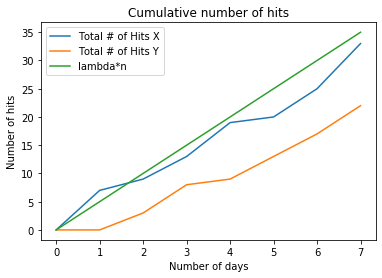

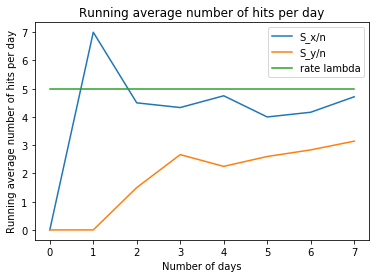

In [5]:
lamb = 5. #Our rate of hits per day
N = 7 #Number of days we are going to simulate over
x = [st.poisson.rvs(lamb)]    #Gets the number of hits on the first day and stores it in a vector
y = [np.random.poisson(lamb)] #Same using numpy instead of scipy.stats
Sx = [0] #Sx will represent cumulative sums of the random variates at different times
Sy = [0] 
Ax = [0.0] #Ax will be an array of averages, Sx/n, at different times
Ay = [0.0]

for n in range(1,N+1): #Simulates over N days
    x.append(st.poisson.rvs(lamb)) #Appends the number of hits of the next day to the vector
    y.append(np.random.poisson(lamb))
    Sx.append(Sx[n-1]+x[n]) #Appends the sum at n to the vector
    Sy.append(Sy[n-1]+y[n])
    Ax.append(Sx[n]/(1.*n)) #Appends the sum over n to the vector
    Ay.append(Sy[n]/(1.*n))

n = np.linspace(0,N,N+1) #Generates an array of N+1 points from 0 to N for graphing purposes

plt.plot(Sx, label = 'Total # of Hits X') #Plots the total number of hits
plt.plot(Sy, label = 'Total # of Hits Y')
plt.plot(n, lamb*n, label = 'lambda*n') #Plots a line based on the rate given
plt.title('Cumulative number of hits')
plt.ylabel('Number of hits')
plt.xlabel('Number of days')
plt.legend()

plt.figure() #Creates a new figure
plt.plot(Ax, label = 'S_x/n') #Plots the average number of hits
plt.plot(Ay, label = 'S_y/n')
plt.plot(lamb*np.ones(N+1), label = 'rate lambda') #Plots the expected average
plt.title('Running average number of hits per day')
plt.ylabel('Running average number of hits per day')
plt.xlabel('Number of days')
plt.legend()

You can play with the above code. Change $\lambda$ or change the number of days we simulate over. You should see that $\frac{S_n}{n}\to\lambda$ as the number of days, $n$, increases. 
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** Using your discrete die rolling RV, once again simulate 10000 rolls of the die. 

1. Show graphically that the law of large numbers is maintained for the average of the numbers of the first $n$ rolls as $n\rightarrow\infty.$ 
2. What would be a rough approximation of the sum? Of the average?  

(Note: There is no parameter $\lambda$ associated with the roll of a die.  But the mean value of a roll plays the same role.)

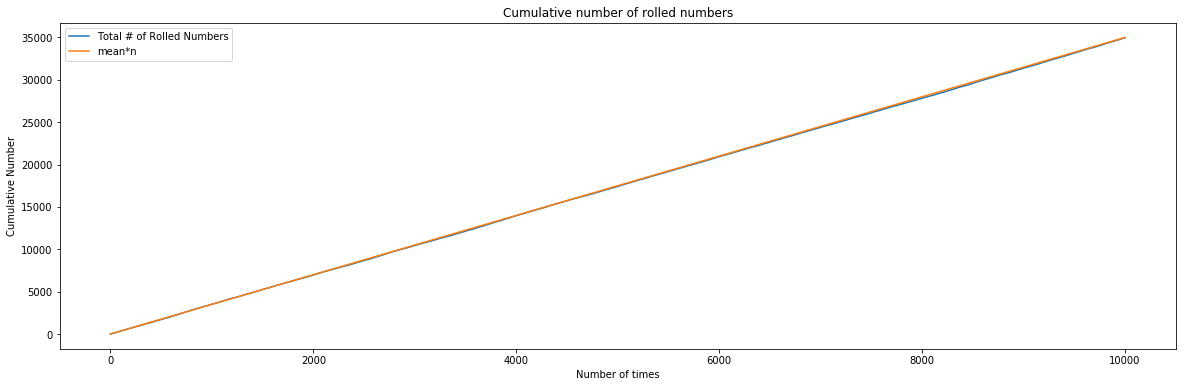

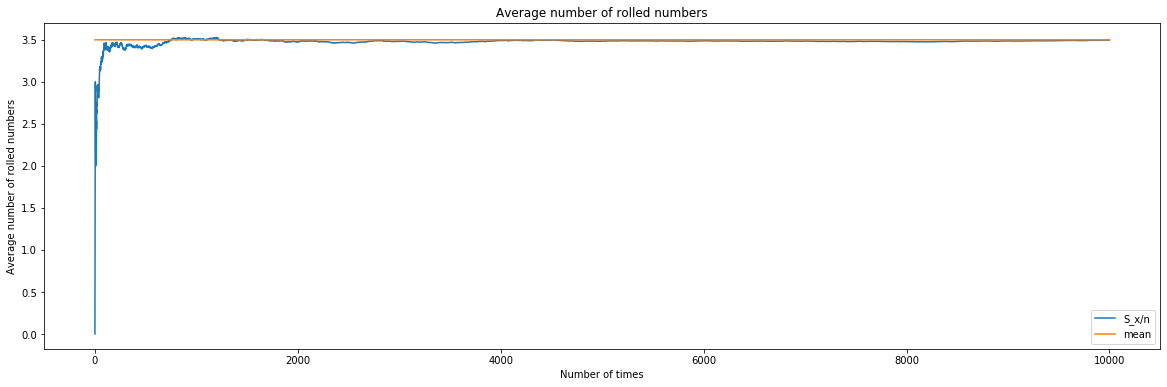

In [6]:
# Your code here

mean = 3.5
N = 10000 #Number of simulation we are going to do
x = [Xcstm_2.rvs(size=1)] #Gets the first number from simulation
Sx = [0] #Sx will represent cumulative sums of the random variates at different times
Ax = [0.0] #Ax will be an array of averages, Sx/n, at different times

for n in range(1,N+1): #Simulates N times
    x.append(Xcstm_2.rvs(size=1)) #Appends number of the next simulation to the vector
    Sx.append(Sx[n-1]+x[n]) #Appends the sum at n to the vector
    Ax.append(Sx[n]/(1.*n)) #Appends the sum over n to the vector
    
n = np.linspace(0,N,N+1) #Generates an array of N+1 points from 0 to N for graphing purposes

plt.figure(figsize = (20,6))
plt.plot(Sx, label = 'Total # of Rolled Numbers') #Plots the total number of hits
plt.plot(n, mean*n, label = 'mean*n') #Plots a line based on the rate given
plt.title('Cumulative number of rolled numbers')
plt.ylabel('Cumulative Number')
plt.xlabel('Number of times')
plt.legend()

plt.figure(figsize = (20,6))
plt.plot(Ax, label = 'S_x/n') #Plots the average number of rolled numbers
plt.plot(mean*np.ones(N+1), label = 'mean') #Plots the expected average
plt.title('Average number of rolled numbers')
plt.ylabel('Average number of rolled numbers')
plt.xlabel('Number of times')
plt.legend()

__Answer:__ A rough approximation of the sum would be 35000, and a rough approximation of the average would be 3.5.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

## Additional Lab Questions:

**For the completeion of this lab, make sure to do questions 1-2 as well as these two additional questions:**
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** If you thought you could get out of your first probability lab without some questions on poker hands, I'm sorry, but they're too good to pass up. Suppose you draw five cards from a standard 52 card deck.
<ol><li>Calculate the probabilities of getting a TWO PAIR, THREE OF A KIND, FULLHOUSE, and a FLUSH; print out these probabilities. You need to write down your calculation process, either in a markdown or code cell, not just the result probabilities. (Note: FLUSHes include straight/royal FLUSHes) </li> 
<li>Simulate 1,000,000 poker hands, count the number of times you get for each of the above hands and find the empirical probability of getting each of the above hands.  Your simulated hands
should include all possible poker hands. (Hint: One way to represent a random poker hand is to use a 4 by 13 binary array with ones placed at five randomly chosen locations.  The np.sum command can be used to compute row or column sums. If you don't know how to generate random integers in Python, Google is a good source for help.)</li>
<li>Do the probabilities match up relatively well?</li>
</ol>

(For most lab questions in ECE314, you will be graded based on the correctness of your answers, regardless of how you code. However, for part 2 of this problem, you may lose a few points for very inefficient code, e.g. with a lot of for loops and unecessary if structures. As a general guideline, if your program can run in one minute (for 1,000,000 hands), it should be sufficiently efficient, although this is not a hard requirement). 

In [7]:
# Your code here (add addtitional code/markdown cells if needed)

# code for part 1

# calculate the probabilities of getting a TWO PAIR
p_c_TWO_PAIR = (sp.special.comb(13,3)*sp.special.comb(3,1)*sp.special.comb(4,2)*sp.special.comb(4,2)*sp.special.comb(4,1))/(sp.special.comb(52,5))

# calculate the probabilities of getting a THREE OF A KIND
p_c_THREE_OF_A_KIND = (sp.special.comb(13,3)*sp.special.comb(3,1)*sp.special.comb(4,3)*sp.special.comb(4,1)*sp.special.comb(4,1))/(sp.special.comb(52,5))

# calculate the probabilities of getting a FULLHOUSE
p_c_FULLHOUSE = (sp.special.comb(13,2)*sp.special.comb(2,1)*sp.special.comb(4,3)*sp.special.comb(4,2))/(sp.special.comb(52,5))

# calculate the probabilities of getting a FLUSH
p_c_FLUSH = (sp.special.comb(4,1)*sp.special.comb(13,5))/(sp.special.comb(52,5))

# print out calculated probability
print("Calculated probability of getting a TWO PAIR: ", p_c_TWO_PAIR)
print("Calculated probability of getting a THREE OF A KIND: ", p_c_THREE_OF_A_KIND)
print("Calculated probability of getting a FULLHOUSE: ", p_c_FULLHOUSE)
print("Calculated probability of getting a FLUSH: ", p_c_FLUSH)
print("\n")

# code for part 2

# set up
n_TWO_PAIR = 0
n_THREE_OF_A_KIND = 0
n_FULLHOUSE = 0
n_FLUSH = 0
n=1000000

for i in range(n):
    
    # generate poker hand
    poker = np.zeros((4,13))
    j = 5
    
    while 0 < j:
        suit = np.random.randint(4)
        number = np.random.randint(13)
        if 1 == poker[suit, number]:
            continue
        else:
            poker[suit, number] = 1 
            j -= 1
            
    suit_sum = np.sum(poker, axis = 1)
    number_sum = np.sum(poker, axis = 0)
    
    # count for FLUSH
    suit_count_5 = list(suit_sum).count(5)
    
    # count for TWO PAIR and FULLHOUSE
    number_count_2 = list(number_sum).count(2)
    
    # count for THREE OF A KIND and FULLHOUSE
    number_count_3 = list(number_sum).count(3)
    
    # FLUSH
    if 1 == suit_count_5:
        n_FLUSH += 1
        
    # TWO PAIR
    if 2 == number_count_2:
        n_TWO_PAIR += 1
        
    # THREE OF A KIND
    if 1 == number_count_3 and 1 != number_count_2:
        n_THREE_OF_A_KIND += 1
        
    # FULLHOUSE
    if 1 == number_count_3 and 1 == number_count_2:
        n_FULLHOUSE += 1
        
# calculate the empirical probability
p_e_TWO_PAIR = n_TWO_PAIR / n
p_e_THREE_OF_A_KIND = n_THREE_OF_A_KIND / n
p_e_FULLHOUSE = n_FULLHOUSE / n
p_e_FLUSH = n_FLUSH / n

# print out empirical probability
print("Empirical probability of getting a TWO PAIR: ", p_e_TWO_PAIR)
print("Empirical probability of getting a THREE OF A KIND: ", p_e_THREE_OF_A_KIND)
print("Empirical probability of getting a FULLHOUSE: ", p_e_FULLHOUSE)
print("Empirical probability of getting a FLUSH: ", p_e_FLUSH)

Calculated probability of getting a TWO PAIR:  0.0475390156062425
Calculated probability of getting a THREE OF A KIND:  0.02112845138055222
Calculated probability of getting a FULLHOUSE:  0.0014405762304921968
Calculated probability of getting a FLUSH:  0.0019807923169267707


Empirical probability of getting a TWO PAIR:  0.047666
Empirical probability of getting a THREE OF A KIND:  0.02117
Empirical probability of getting a FULLHOUSE:  0.00145
Empirical probability of getting a FLUSH:  0.002008


$
\textbf{Calculate the probabilities of getting a TWO PAIR}\\
P(\text{TWO PAIR}) = \frac{\binom{13}{3} \binom{3}{1} \binom{4}{2} \binom{4}{2} \binom{4}{1}}{\binom{52}{5}} \approx 0.047539\\
\text{We need three kinds of numbers to form a TWO PAIR, so we choose 3 out of 13 numbers in $\binom{13}{3}$ ways.}\\
\text{Then, we choose 1 out of the 3 numbers, in $\binom{3}{1}$ ways, to be the one that does not form a pair.}\\
\text{Finally, we choose 2 suits of 2 numbers to form a TWO PAIR and 1 suit of the third number to form 5-card poker hand in $\binom{4}{2}\binom{4}{2}\binom{4}{1}$ ways.}\\
\text{Besides, there are $\binom{52}{5}$ ways in total to draw 5 cards from a standard 52 card deck.}\\ \ \\ \ \\
\textbf{Calculate the probabilities of getting a THREE OF A KIND}\\
P(\text{THREE OF A KIND}) = \frac{\binom{13}{3} \binom{3}{1} \binom{4}{3} \binom{4}{1} \binom{4}{1}}{\binom{52}{5}} \approx 0.021128\\
\text{We need three kinds of numbers to form a THREE OF A KIND, so we choose 3 out of 13 numbers in $\binom{13}{3}$ ways.}\\
\text{Then, we choose 1 out of the 3 numbers, in $\binom{3}{1}$ ways, to be the one that forms THREE OF A KIND.}\\
\text{Finally, we choose 1 suit of 2 numbers and 3 suits of the third number to form a THREE OF A KIND in $\binom{4}{3}\binom{4}{1}\binom{4}{1}$ ways.}\\
\text{Besides, there are $\binom{52}{5}$ ways in total to draw 5 cards from a standard 52 card deck.}\\ \ \\ \ \\
\textbf{Calculate the probabilities of getting a FULLHOUSE}\\
P(\text{FULLHOUSE}) = \frac{\binom{13}{2} \binom{2}{1} \binom{4}{3} \binom{4}{2}}{\binom{52}{5}} \approx 0.001441\\
\text{We need two kinds of numbers to form a FULLHOUSE, so we choose 2 out of 13 numbers in $\binom{13}{2}$ ways.}\\
\text{Then, we choose 1 out of the 2 numbers, in $\binom{2}{1}$ ways, to be the one that forms a pair.}\\
\text{Finally, we choose 3 suits of 1 number and 2 suits of the other number to form a FULLHOUSE in $\binom{4}{3}\binom{4}{2}$ ways.}\\
\text{Besides, there are $\binom{52}{5}$ ways in total to draw 5 cards from a standard 52 card deck.}\\ \ \\ \ \\
\textbf{Calculate the probabilities of getting a FLUSH}\\
P(\text{FLUSH}) = \frac{\binom{4}{1} \binom{13}{5}}{\binom{52}{5}} \approx 0.001981\\
\text{We need one kind of suits to form a FLUSH, so we choose 1 out of 4 suits in $\binom{4}{1}$ ways.}\\
\text{Then, we choose 5 numbers of 1 suit to form a FLUSH in $\binom{13}{5}$ ways.}\\
\text{Besides, there are $\binom{52}{5}$ ways in total to draw 5 cards from a standard 52 card deck.}\\
$

__Answer:__ Yes, they do.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 4:</SPAN>** A classic problem when being introduced to probability is the Monty Hall problem. If you've ever seen "Let's Make a Deal" on television, this problem takes from that show. You're the contestant. The host of the show gives you three doors to choose from. One door chosen at random holds a grand prize and the other two hold worthless items. You choose your door, and then the host reveals one of the doors you didn't choose such that it always holds a worthless item.  (If you initially choose the door with the grand prize, the host reveals either of the other doors with equal probability.) So now there are two doors left and the host asks you whether you would like to switch. What should you do?
<ol><li>Write down your first reaction? Would you switch doors or keep the one you have? Why?</li>
    <li>Create this scenario and simulate the strategy of sticking with the same door 1,000,000 times. What percentage of time did you win?</li>
    <li>Simulate the strategy of switching doors 1,000,000 times. What percentage of time did you win?</li>
    <li>Which strategy would you use now? Explain why this is the case.</li>
</ol>

In the simulation, you can simulate every step that happens in the actual game and exactly as it happens, even for very trivial steps. You can also clever-guess some parts and skip some trivial steps; if you do that, make sure you briefly reason about why you do so in comments, so that the graders know that you understand what actually happens in the game. There is no timing requirement for this problem.  

__Answer of Part 1:__ I would switch. If the door I choose initially holds a worthless item, the host reveals the other door that holds a worthless item, which means that the door not opened by the host holds a grand prize. As a result, I will choose the door holding a grand prize for sure if I switch. By contrast, if the door I choose initially holds a grand prize, the host reveals either of the other doors with equal probability. Then, the probability that I get the grand prize is $\frac{1}{2}$ no matter whether I choose to switch or not. Therefore, switching the door seems to have a higher probability to get the grand prize.

In [8]:
# Your code here (add addtitional code/markdown cells if needed)

n_trial = 1000000

# code for part 2

n_win_not_switch = 0

for i in range(n):
    grand_prize = np.random.randint(3) # randomly place the grand prize
    my_choice = np.random.randint(3) # generate my choice
    
    # The only way to win if I stick with the same door is to choose the right door initially,
    # because I do not switch door once I chose.
    if my_choice == grand_prize:
        n_win_not_switch += 1
        
p_w_not_switch = n_win_not_switch / n

print('Percentage of time I won if I stick with the same door: %.4f%%' % (p_w_not_switch * 100))

# code for part 3

n_win_switch = 0

for i in range(n):
    grand_prize = np.random.randint(3) # randomly place the grand prize
    my_choice = np.random.randint(3) # generate my choice
    
    # The only way to win if I switch door is to choose one of the wrong doors initially,
    # because the host will tell me one of the wrong doors. If I choose the right door initially,
    # I fail for switching to a wrong door. If I choose one of the wrong doors initially, I win for
    # switching to the right door.
    if my_choice != grand_prize:
        n_win_switch += 1
        
p_w_switch = n_win_switch / n

print('Percentage of time I won if I switch door: %.4f%%' % (p_w_switch * 100))

Percentage of time I won if I stick with the same door: 33.4188%
Percentage of time I won if I switch door: 66.5771%


__Answer of Part 4:__ I would switch, because the probability to get the prize if I switch is higher than that if I stick with the same door, based on the simulation result. From theoretical analysis, we can get the same result, which is that switching-door probability to get the prize is $\frac{2}{3}$ while sticking-door probability to get the prize is $\frac{1}{3}$. Let's consider the sticking-door strategy first, for it is simple. If you choose the right door initially, you will win the prize for sure. Otherwise, there is no chance for you to win, because you stick with one of the wrong doors once you choose it. The probability to choose the correct door initially is $\frac{1}{3}$, so the probability to get the prize using sticking strategy is $\frac{1}{3}$. By contrast, you will get the prize if you choose one of the wrong doors initially, using switching strategy. If you choose one of the wrong doors initially, the host will tell you the other wrong door. Therefore, you will definitely get the prize by switching to the right door. If you choose the right door initially, you will end up switching to a wrong door undoubtedly. As a result, the probability to get the prize using switching strategy is simply the probability of choosing one of the wrong doors initially, which is $\frac{2}{3}$. To conclude, theoretical analysis agrees with simulation result. 

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 4</SPAN>**

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 